# Machine Learning - Unsupervised Learning - Dataset2

## 1. Import Modules

In [49]:
# Basic Modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time

# Data Related Modules
import pandas as pd

# Data Processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Data Processing - Splitting Test / Train Data
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# MLP Neural Network
from sklearn.neural_network import MLPClassifier

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# SVM
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier

# Validating the Model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, homogeneity_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_squared_error

# Optimization
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Cluster
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Dimensionality Reduction
from sklearn.decomposition import PCA, FastICA as ICA, TruncatedSVD as SVD
from sklearn.random_projection import GaussianRandomProjection as RP

## 2. Import Data

In [50]:
# Grab the data and convert csv to pandas dataframe.
messidor_df = pd.read_csv("messidor_features.csv")
messidor_df.head()

,quality,pre-screening,madetection1,madetection2,madetection3,madetection4,madetection5,madetection6,exudates1,exudates2,exudates3,exudates4,exudates5,exudates6,exudates7,exudates8,euclideandistance,diameter,biaryresult,classes
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [51]:
# See how many columns and row is in the dataframe
messidor_df.shape

(1151, 20)

In [52]:
# See the column names
messidor_df.keys()

Index(['quality', 'pre-screening', 'madetection1', 'madetection2',
       'madetection3', 'madetection4', 'madetection5', 'madetection6',
       'exudates1', 'exudates2', 'exudates3', 'exudates4', 'exudates5',
       'exudates6', 'exudates7', 'exudates8', 'euclideandistance', 'diameter',
       'biaryresult', 'classes'],
      dtype='object')

In [53]:
# Remove unnecessary columns for the better dataframe. (Diagnosis in this case will be considered as a target (y))
X = messidor_df.drop(['classes'], axis=1)
X.head()

,quality,pre-screening,madetection1,madetection2,madetection3,madetection4,madetection5,madetection6,exudates1,exudates2,exudates3,exudates4,exudates5,exudates6,exudates7,exudates8,euclideandistance,diameter,biaryresult
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0


In [54]:
# Set diagnosis  as a target(y) and transform the letters into integer value
y = messidor_df.classes
# There are 762 authentic and 610 forgery in the database
np.bincount(y)

array([540, 611], dtype=int64)

## 3. K-mean Clustering

### 3.1 Elbow Curve

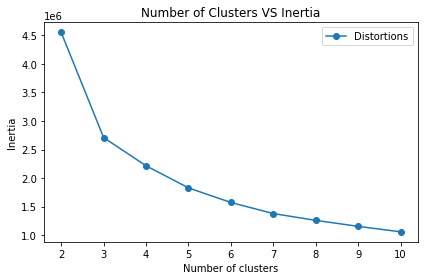

In [55]:
inertias = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X,y)
    inertias.append(km.inertia_)
    
plt.plot(range(2,11), inertias, marker='o', label='Distortions')
plt.title("Number of Clusters VS Inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 3.2 Silhouette Score

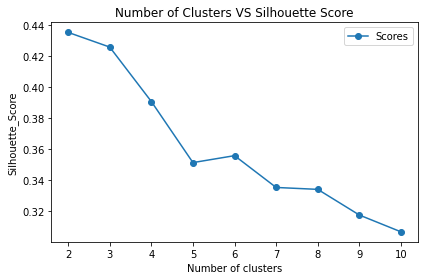

[0.43523480827331873, 0.42574176345202674, 0.3906239559845564, 0.35119809158346255, 0.35567597392937683, 0.33515318697102237, 0.33392414311400914, 0.31735812883301623, 0.30651900874538657]
0.3612698956540195


In [56]:
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    labels = km.fit_predict(X)

    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o', label='Scores')
plt.title("Number of Clusters VS Silhouette Score")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores)
print (sum(silhouette_scores)/len(silhouette_scores))

## 4. Expectation Maximization Clustering

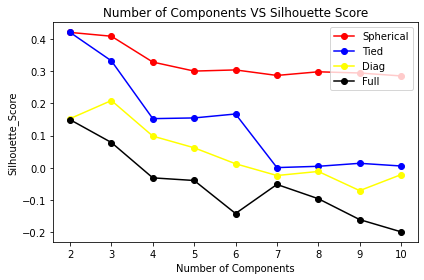

[0.42037076879334295, 0.4084764832492379, 0.3282290562631233, 0.3002587686572307, 0.30386288530933747, 0.28673785722515405, 0.29804596504423564, 0.29433810360296647, 0.2851942429810356]
0.3250571256806294


In [57]:
silhouette_scores_one = []
silhouette_scores_two = []
silhouette_scores_three = []
silhouette_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    silhouette_scores_one.append(silhouette_score(X, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    silhouette_scores_two.append(silhouette_score(X, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    silhouette_scores_three.append(silhouette_score(X, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    silhouette_scores_four.append(silhouette_score(X, labels))


plt.plot(range(2,11), silhouette_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), silhouette_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), silhouette_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), silhouette_scores_four, marker='o', color='black', label='Full')
plt.title("Number of Components VS Silhouette Score")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores_one)
print (sum(silhouette_scores_one)/len(silhouette_scores_one))

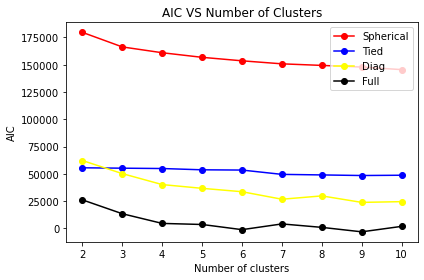

In [58]:
aic_scores_one = []
aic_scores_two = []
aic_scores_three = []
aic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    aic_scores_one.append(em.aic(X))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X)
    aic_scores_two.append(ems.aic(X))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X)
    aic_scores_three.append(emss.aic(X))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X)
    aic_scores_four.append(emsss.aic(X))

plt.plot(range(2,11), aic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), aic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), aic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), aic_scores_four, marker='o', color='black', label='Full')
plt.title('AIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

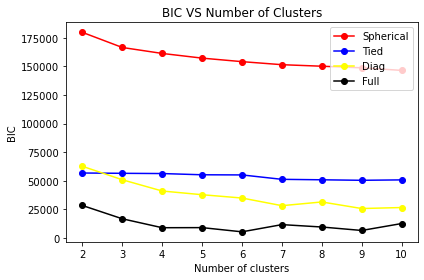

In [59]:
bic_scores_one = []
bic_scores_two = []
bic_scores_three = []
bic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    bic_scores_one.append(em.bic(X))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X)
    bic_scores_two.append(ems.bic(X))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X)
    bic_scores_three.append(emss.bic(X))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X)
    bic_scores_four.append(emsss.bic(X))

plt.plot(range(2,11), bic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), bic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), bic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), bic_scores_four, marker='o', color='black', label='Full')
plt.title('BIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

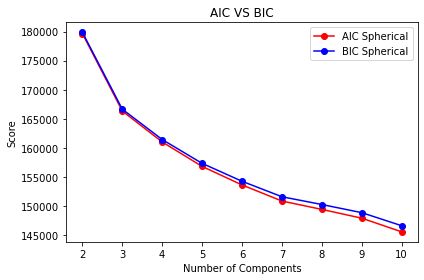

In [60]:
aic_s = []
bic_s = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    aic_s.append(em.aic(X))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X)
    bic_s.append(em.bic(X))
    
plt.plot(range(2,11), aic_s, marker='o', color='red', label='AIC Spherical')
plt.plot(range(2,11), bic_s, marker='o', color='blue', label='BIC Spherical')
plt.title('AIC VS BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## 5. Dimensionality Reduction - PCA

### 5.1 PCA Fitting

In [61]:
pca = PCA(random_state=1)
X2 = pca.fit(X)
X2

PCA(random_state=1)

In [62]:
X2.explained_variance_

array([4.30491893e+03, 2.23943647e+03, 2.05350270e+02, 6.68956787e+01,
       2.20852572e+01, 6.81975342e+00, 5.93635000e+00, 2.10829277e+00,
       1.17595573e+00, 6.64893837e-01, 4.64181055e-01, 1.72530638e-01,
       1.59394997e-01, 7.36369335e-02, 1.91669501e-02, 3.40079804e-03,
       1.83223159e-03, 7.64058030e-04, 2.91430959e-04])

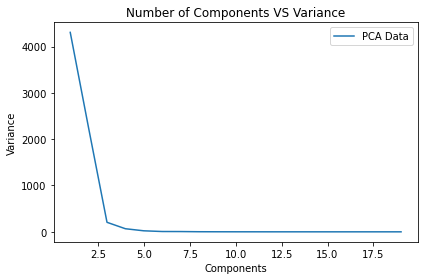

19


In [63]:
plt.plot(np.arange(1, X2.explained_variance_.size + 1), X2.explained_variance_, label='PCA Data')
plt.title("Number of Components VS Variance")
plt.xlabel('Components')
plt.ylabel('Variance')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print(X2.explained_variance_.size)

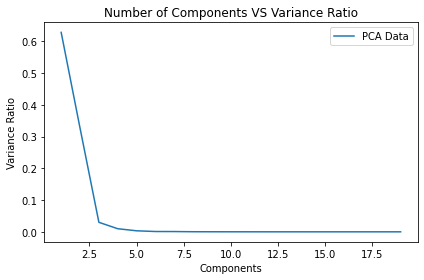

In [64]:
plt.plot(np.arange(1, X2.explained_variance_ratio_.size + 1), X2.explained_variance_ratio_, label='PCA Data')
plt.title("Number of Components VS Variance Ratio")
plt.xlabel('Components')
plt.ylabel('Variance Ratio')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

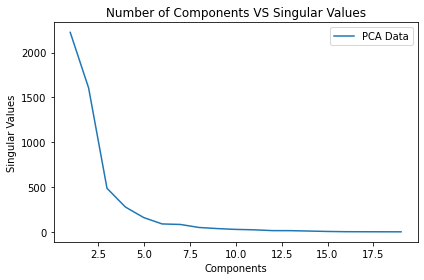

In [65]:
plt.plot(np.arange(1, X2.singular_values_.size + 1), X2.singular_values_, label='PCA Data')
plt.title("Number of Components VS Singular Values")
plt.xlabel('Components')
plt.ylabel('Singular Values')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

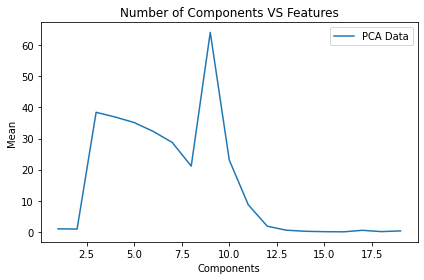

In [66]:
plt.plot(np.arange(1, X2.mean_.size + 1), X2.mean_, label='PCA Data')
plt.title("Number of Components VS Features")
plt.xlabel('Components')
plt.ylabel('Mean')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 5.2 PCA K-Mean Clustering

In [67]:
pca = PCA(n_components=7, random_state=1)
X2 = pca.fit_transform(X)
X2

array([[  1.97900675, -35.29198306,   0.52145701, ...,  -0.12848511,
         -0.05817696,   0.37082685],
       [  9.51735214, -30.41481657,   2.06904762, ...,  -4.51480822,
          1.81439269,   1.91269303],
       [-30.04541025,  42.04944764,   6.14547757, ...,   1.60306483,
          0.46784829,  -2.57797457],
       ...,
       [-45.52033998,   7.81926614,  -0.79244061, ...,  -1.46645394,
          1.06312492,  -0.13138263],
       [-14.02192446, -26.11775228,  -2.06165012, ...,  -0.74530974,
         -1.61508421,   0.74113521],
       [ 30.76964234, -56.68588172, -14.8712011 , ...,   1.84419732,
          0.09869847,  -0.33692639]])

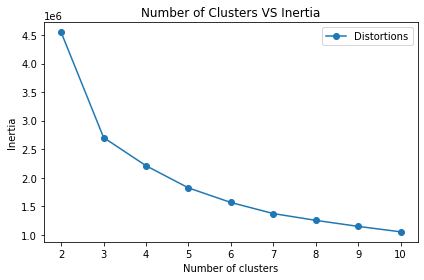

[0.43560714465620665, 0.42640114381348443, 0.3904215282513901, 0.35213387130284907, 0.3567021056487812, 0.3364995337008027, 0.3352166029843581, 0.31878310717107455, 0.30802860340032623]
0.36219929343658586


In [70]:
### 5.2 PCA K-Mean Clustering
inertias = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X2,y)
    inertias.append(km.inertia_)
    
plt.plot(range(2,11), inertias, marker='o', label='Distortions')
plt.title("Number of Clusters VS Inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores)
print (sum(silhouette_scores)/len(silhouette_scores))

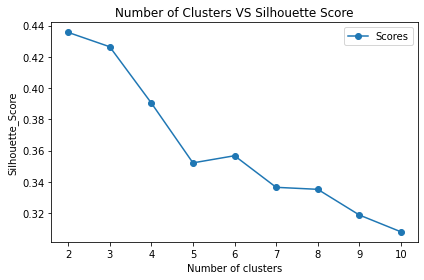

In [71]:
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    labels = km.fit_predict(X2)

    silhouette_avg = silhouette_score(X2, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o', label='Scores')
plt.title("Number of Clusters VS Silhouette Score")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 5.3 PCA Expectation Maximization Clustering

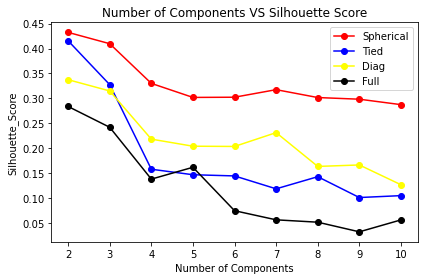

[0.4325071953680286, 0.40973597307546994, 0.32999832727586986, 0.3018095804274029, 0.3022212899100596, 0.3174014294620313, 0.3015782423485212, 0.29822597362406683, 0.28729475920448416]
0.3311969745217705


In [79]:
silhouette_scores_one = []
silhouette_scores_two = []
silhouette_scores_three = []
silhouette_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    silhouette_scores_one.append(silhouette_score(X2, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    silhouette_scores_two.append(silhouette_score(X2, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    silhouette_scores_three.append(silhouette_score(X2, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    silhouette_scores_four.append(silhouette_score(X2, labels))


plt.plot(range(2,11), silhouette_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), silhouette_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), silhouette_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), silhouette_scores_four, marker='o', color='black', label='Full')
plt.title("Number of Components VS Silhouette Score")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
print (silhouette_scores_one)
print (sum(silhouette_scores_one)/len(silhouette_scores_one))


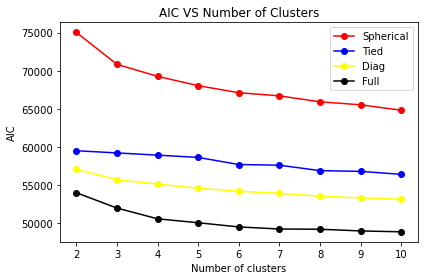

[0.4325071953680286, 0.40973597307546994, 0.32999832727586986, 0.3018095804274029, 0.3022212899100596, 0.3174014294620313, 0.3015782423485212, 0.29822597362406683, 0.28729475920448416]
0.3311969745217705


In [78]:
aic_scores_one = []
aic_scores_two = []
aic_scores_three = []
aic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    aic_scores_one.append(em.aic(X2))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X2)
    aic_scores_two.append(ems.aic(X2))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X2)
    aic_scores_three.append(emss.aic(X2))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X2)
    aic_scores_four.append(emsss.aic(X2))

plt.plot(range(2,11), aic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), aic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), aic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), aic_scores_four, marker='o', color='black', label='Full')
plt.title('AIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


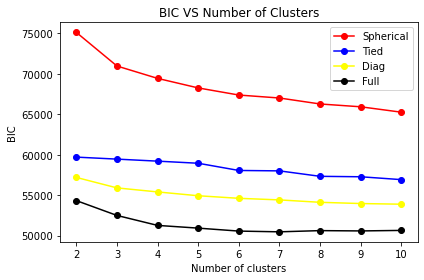

In [74]:
bic_scores_one = []
bic_scores_two = []
bic_scores_three = []
bic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    bic_scores_one.append(em.bic(X2))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X2)
    bic_scores_two.append(ems.bic(X2))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X2)
    bic_scores_three.append(emss.bic(X2))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X2)
    bic_scores_four.append(emsss.bic(X2))

plt.plot(range(2,11), bic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), bic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), bic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), bic_scores_four, marker='o', color='black', label='Full')
plt.title('BIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

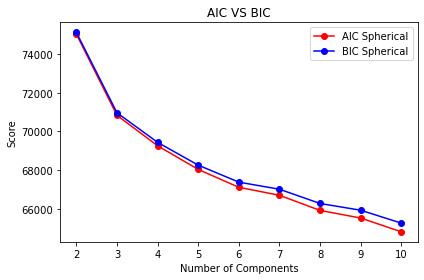

In [76]:
aic_s = []
bic_s = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    aic_s.append(em.aic(X2))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    bic_s.append(em.bic(X2))
    
plt.plot(range(2,11), aic_s, marker='o', color='red', label='AIC Spherical')
plt.plot(range(2,11), bic_s, marker='o', color='blue', label='BIC Spherical')
plt.title('AIC VS BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## 6. Dimensionality Reduction - ICA

### 6.1 ICA Fitting

In [83]:
ica = ICA(random_state=1)
X3 = ica.fit(X)
X3

FastICA(random_state=1)

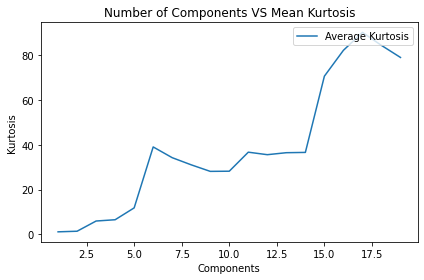

In [84]:
kurt = []
components = []

for i in range(1,20):
    ica.set_params(n_components=i)
    components.append(i)
    kurt.append(pd.DataFrame(ica.fit_transform(X)).kurt(axis=0).mean())

plt.plot(components, kurt, label='Average Kurtosis')
plt.title("Number of Components VS Mean Kurtosis")
plt.xlabel('Components')
plt.ylabel('Kurtosis')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

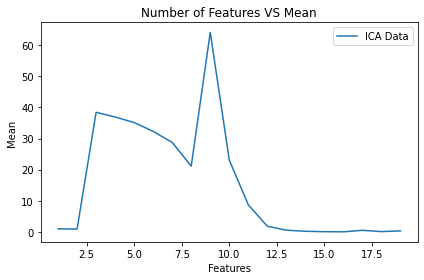

In [82]:
plt.plot(np.arange(1, X3.mean_.size + 1), X3.mean_, label='ICA Data')
plt.title("Number of Features VS Mean")
plt.xlabel('Features')
plt.ylabel('Mean')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

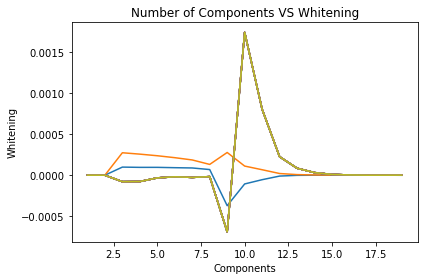

In [26]:
plt.plot(np.arange(1, X3.whitening_[0].size + 1), X3.whitening_[0])
plt.plot(np.arange(1, X3.whitening_[1].size + 1), X3.whitening_[1])
plt.plot(np.arange(1, X3.whitening_[2].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[3].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[4].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[5].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[6].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[7].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[8].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[9].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[10].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[11].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[12].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[13].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[14].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[15].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[16].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[17].size + 1), X3.whitening_[2])
plt.plot(np.arange(1, X3.whitening_[18].size + 1), X3.whitening_[2])

plt.title("Number of Components VS Whitening")
plt.xlabel('Components')
plt.ylabel('Whitening')
plt.tight_layout()
plt.show()

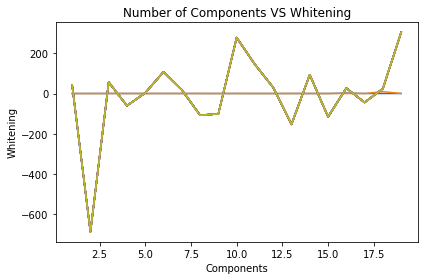

In [27]:
plt.plot(np.arange(1, X3.mixing_[0].size + 1), X3.mixing_[0])
plt.plot(np.arange(1, X3.mixing_[1].size + 1), X3.mixing_[1])
plt.plot(np.arange(1, X3.mixing_[2].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[3].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[4].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[5].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[6].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[7].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[8].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[9].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[10].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[11].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[12].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[13].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[14].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[15].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[16].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[17].size + 1), X3.mixing_[2])
plt.plot(np.arange(1, X3.mixing_[18].size + 1), X3.mixing_[2])

plt.title("Number of Components VS Whitening")
plt.xlabel('Components')
plt.ylabel('Whitening')
plt.tight_layout()
plt.show()

### 6.2 ICA K-Mean Clustering

In [85]:
ica = ICA(n_components=5,random_state=1)
X3 = ica.fit_transform(X)
X3

array([[-0.01792186, -0.00639902,  0.00540997,  0.00933875, -0.0032248 ],
       [-0.02080745, -0.00959628,  0.01861378, -0.00404707,  0.01913718],
       [ 0.02767192, -0.00898217, -0.01467796, -0.00800049, -0.00238982],
       ...,
       [ 0.01999117, -0.00744061,  0.01441221,  0.01696621,  0.00331311],
       [-0.02998047, -0.01728963,  0.01294597, -0.05795485, -0.01856418],
       [-0.03341037,  0.02145712,  0.01373516,  0.01530882, -0.02279936]])

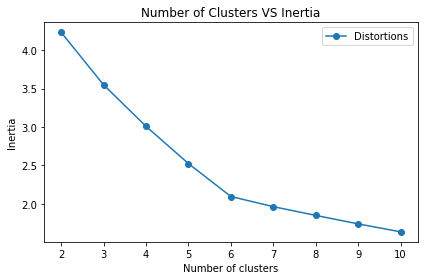

In [86]:
inertias = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X3,y)
    inertias.append(km.inertia_)
    
plt.plot(range(2,11), inertias, marker='o', label='Distortions')
plt.title("Number of Clusters VS Inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

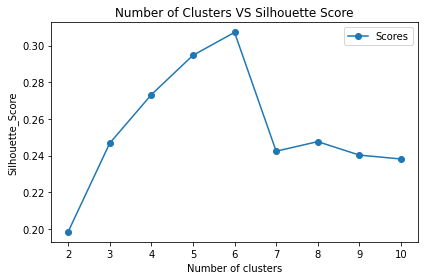

[0.19847422432592898, 0.24679146436957386, 0.2732252890023028, 0.29468277231997775, 0.3072019175527046, 0.24242826951126067, 0.24763837292470045, 0.2403061028947814, 0.23817157154139676]
0.2543244427158475


In [94]:
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    labels = km.fit_predict(X3)

    silhouette_avg = silhouette_score(X3, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o', label='Scores')
plt.title("Number of Clusters VS Silhouette Score")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores)
print (sum(silhouette_scores)/len(silhouette_scores))

### 6.3 PCA Expectation Maximization Clustering

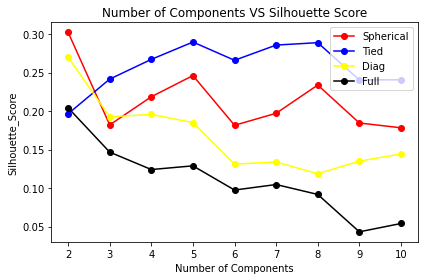

[0.30231093654574615, 0.18214949364578953, 0.21867432148785035, 0.2461999834066078, 0.18160986231213253, 0.1972091890153842, 0.23389192940184983, 0.18457797171107906, 0.1783399805000521]
0.2138848520029435


In [92]:
silhouette_scores_one = []
silhouette_scores_two = []
silhouette_scores_three = []
silhouette_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    silhouette_scores_one.append(silhouette_score(X3, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    silhouette_scores_two.append(silhouette_score(X3, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    silhouette_scores_three.append(silhouette_score(X3, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    silhouette_scores_four.append(silhouette_score(X3, labels))


plt.plot(range(2,11), silhouette_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), silhouette_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), silhouette_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), silhouette_scores_four, marker='o', color='black', label='Full')
plt.title("Number of Components VS Silhouette Score")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores_one)
print (sum(silhouette_scores_one)/len(silhouette_scores_one))

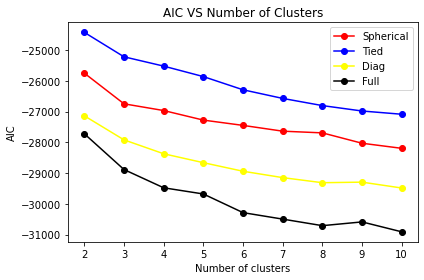

In [89]:
aic_scores_one = []
aic_scores_two = []
aic_scores_three = []
aic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    aic_scores_one.append(em.aic(X3))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X3)
    aic_scores_two.append(ems.aic(X3))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X3)
    aic_scores_three.append(emss.aic(X3))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X3)
    aic_scores_four.append(emsss.aic(X3))

plt.plot(range(2,11), aic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), aic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), aic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), aic_scores_four, marker='o', color='black', label='Full')
plt.title('AIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

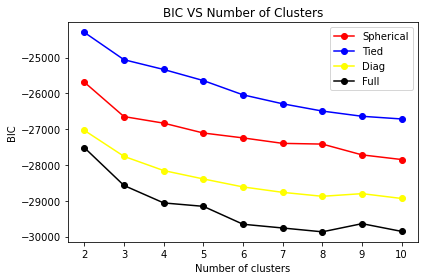

In [90]:
bic_scores_one = []
bic_scores_two = []
bic_scores_three = []
bic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X3)
    bic_scores_one.append(em.bic(X3))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X3)
    bic_scores_two.append(ems.bic(X3))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X3)
    bic_scores_three.append(emss.bic(X3))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X3)
    bic_scores_four.append(emsss.bic(X3))

plt.plot(range(2,11), bic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), bic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), bic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), bic_scores_four, marker='o', color='black', label='Full')
plt.title('BIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

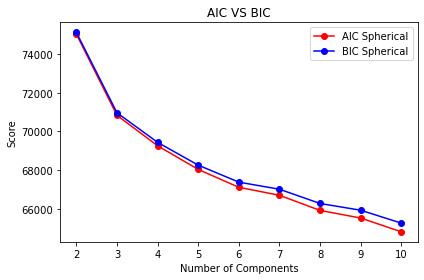

In [91]:
aic_s = []
bic_s = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    aic_s.append(em.aic(X2))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X2)
    bic_s.append(em.bic(X2))
    
plt.plot(range(2,11), aic_s, marker='o', color='red', label='AIC Spherical')
plt.plot(range(2,11), bic_s, marker='o', color='blue', label='BIC Spherical')
plt.title('AIC VS BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## 7. Dimensionality Reduction - RP

### 7.1 RP Fitting

In [95]:
rp = RP(n_components=10, random_state=1)
X4 = rp.fit(X)

X4.components_

array([[ 0.51366311, -0.19345436, -0.16702257, -0.33930247,  0.27366592,
        -0.72781044,  0.55175793, -0.24071476,  0.10088902, -0.07885784,
         0.46235913, -0.65147369, -0.10195727, -0.12144865,  0.35852938,
        -0.34781616, -0.05452659, -0.27760321,  0.01334916],
       [ 0.18430235, -0.34804634,  0.36199342,  0.28510802,  0.15890266,
         0.28487566, -0.21621373, -0.0388613 , -0.29591628, -0.08471365,
         0.16771312, -0.21872233, -0.12546448, -0.21730309, -0.26727749,
        -0.21226666, -0.0040049 , -0.35332456,  0.07412875],
       [ 0.52487553,  0.23465497, -0.06066373, -0.28069292, -0.2362722 ,
         0.53520114,  0.01606682, -0.20143571,  0.06037278,  0.66415899,
         0.0379976 ,  0.19517676,  0.09492219, -0.11139118, -0.36129598,
        -0.11047187, -0.06605816,  0.18550654,  0.26530985],
       [ 0.29444033,  0.09031064,  0.27990621, -0.23856158,  0.3961917 ,
         0.16220265, -0.09426523,  0.154483  , -0.02389787,  0.35785263,
         0.480

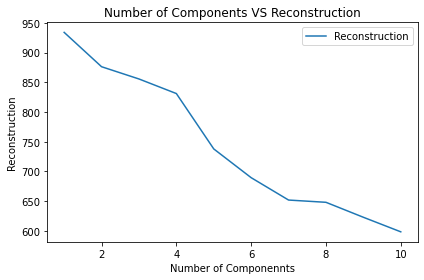

In [96]:
error = []
for i in range(1,11):
    randomized_projection = RP(n_components=i, random_state=1).fit(X)
    transformed_data = randomized_projection.transform(X)
    inverse_data = np.linalg.pinv(randomized_projection.components_.T)
    reconstructed_data = transformed_data.dot(inverse_data)
    error.append(mean_squared_error(X, reconstructed_data))

plt.plot(range(1,11), error, label='Reconstruction')
plt.title("Number of Components VS Reconstruction")
plt.xlabel('Number of Componennts')
plt.ylabel('Reconstruction')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 7.2 RP K-Mean Clustering

In [97]:
rp = RP(n_components=10, random_state=1)
X4 = rp.fit_transform(X)
X4

array([[-6.54227928e+00,  3.02057086e+00,  1.11098184e+01, ...,
        -9.50057479e-03, -1.64833737e+01, -4.06436262e+00],
       [-7.95156107e+00,  1.38237559e+00,  1.40946365e+01, ...,
         1.32568581e+00, -1.89664650e+01, -8.11751480e+00],
       [-2.96692818e+01,  3.45577004e+01,  1.26811821e+01, ...,
        -9.36268821e-01, -2.51662909e+01,  4.09964336e+00],
       ...,
       [-2.51608871e+01,  3.14929658e+01,  2.06296338e+00, ...,
        -5.45093670e+00, -1.85367601e+01,  7.35155180e+00],
       [-1.72541865e+01,  1.95864544e+01,  3.91829000e+00, ...,
        -3.34083807e+00, -9.31032526e+00, -1.85440901e+00],
       [ 3.42602781e+00, -1.51294027e+01,  8.48581999e+00, ...,
        -5.19038969e-01, -1.36267138e+01, -6.09443919e+00]])

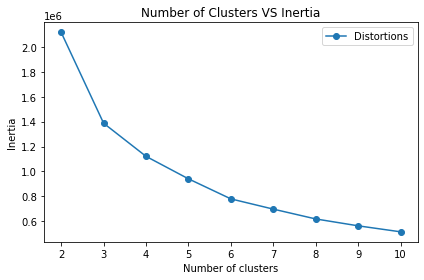

In [98]:
inertias = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X4,y)
    inertias.append(km.inertia_)
    
plt.plot(range(2,11), inertias, marker='o', label='Distortions')
plt.title("Number of Clusters VS Inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

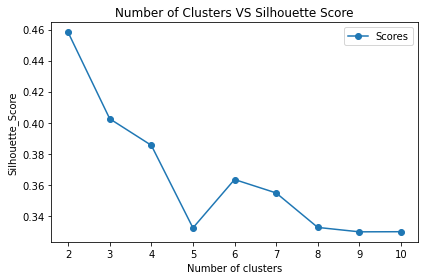

[0.4581674602791607, 0.4025763946956633, 0.38549788695142384, 0.3323489525076108, 0.3634967095078222, 0.3548546429091737, 0.3326712406076099, 0.32983445221164415, 0.3299047724011143]
0.36548361245235805


In [100]:
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    labels = km.fit_predict(X4)

    silhouette_avg = silhouette_score(X4, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o', label='Scores')
plt.title("Number of Clusters VS Silhouette Score")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores)
print (sum(silhouette_scores)/len(silhouette_scores))

### 7.3 RP Expectation Maximization Clustering

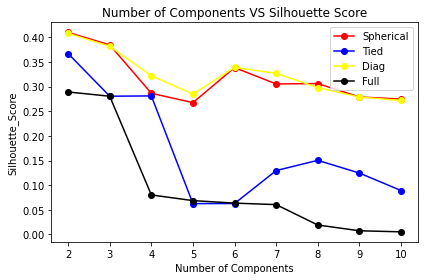

[0.4103066189068621, 0.3848261840170875, 0.286551390434572, 0.26763951979432327, 0.3387327144350287, 0.3055563548069777, 0.30636513984084324, 0.2791554142796463, 0.27479081837023206]
0.3171026838761748


In [101]:
silhouette_scores_one = []
silhouette_scores_two = []
silhouette_scores_three = []
silhouette_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    silhouette_scores_one.append(silhouette_score(X4, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    silhouette_scores_two.append(silhouette_score(X4, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    silhouette_scores_three.append(silhouette_score(X4, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    silhouette_scores_four.append(silhouette_score(X4, labels))


plt.plot(range(2,11), silhouette_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), silhouette_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), silhouette_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), silhouette_scores_four, marker='o', color='black', label='Full')
plt.title("Number of Components VS Silhouette Score")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores_one)
print (sum(silhouette_scores_one)/len(silhouette_scores_one))

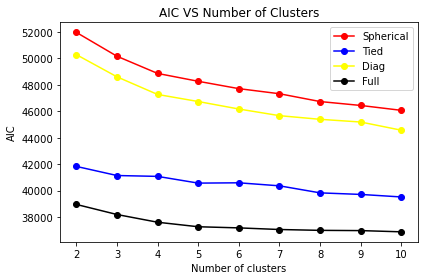

In [40]:
aic_scores_one = []
aic_scores_two = []
aic_scores_three = []
aic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    aic_scores_one.append(em.aic(X4))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X4)
    aic_scores_two.append(ems.aic(X4))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X4)
    aic_scores_three.append(emss.aic(X4))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X4)
    aic_scores_four.append(emsss.aic(X4))

plt.plot(range(2,11), aic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), aic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), aic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), aic_scores_four, marker='o', color='black', label='Full')
plt.title('AIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

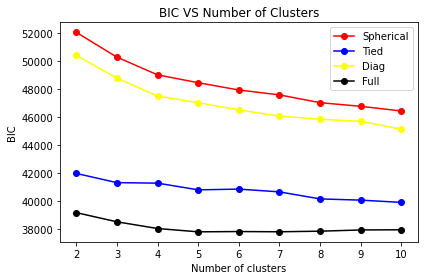

In [41]:
bic_scores_one = []
bic_scores_two = []
bic_scores_three = []
bic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    bic_scores_one.append(em.bic(X4))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X4)
    bic_scores_two.append(ems.bic(X4))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X4)
    bic_scores_three.append(emss.bic(X4))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X4)
    bic_scores_four.append(emsss.bic(X4))

plt.plot(range(2,11), bic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), bic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), bic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), bic_scores_four, marker='o', color='black', label='Full')
plt.title('BIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

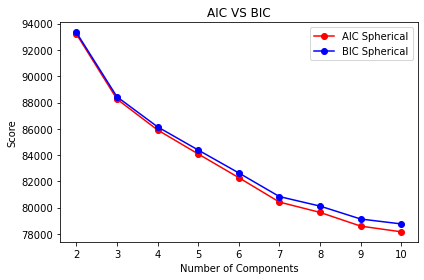

In [103]:
aic_s = []
bic_s = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    aic_s.append(em.aic(X4))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X4)
    bic_s.append(em.bic(X4))
    
plt.plot(range(2,11), aic_s, marker='o', color='red', label='AIC Spherical')
plt.plot(range(2,11), bic_s, marker='o', color='blue', label='BIC Spherical')
plt.title('AIC VS BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## 8. Dimensionality Reduction - SVD

### 8.1 SVD Fitting

In [114]:
svd = SVD(n_components=18, random_state=1)
X5 = svd.fit(X)
X5

TruncatedSVD(n_components=18, random_state=1)

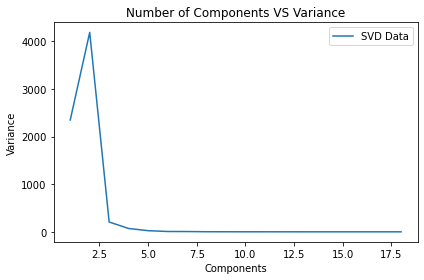

In [115]:
plt.plot(np.arange(1, X5.explained_variance_.size + 1), X5.explained_variance_, label='SVD Data')
plt.title("Number of Components VS Variance")
plt.xlabel('Components')
plt.ylabel('Variance')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

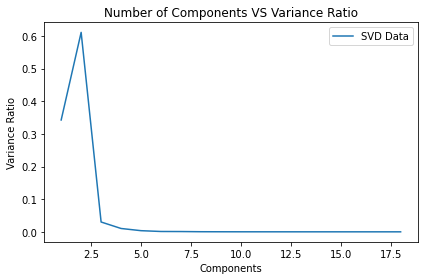

In [116]:
plt.plot(np.arange(1, X5.explained_variance_ratio_.size + 1), X5.explained_variance_ratio_, label='SVD Data')
plt.title("Number of Components VS Variance Ratio")
plt.xlabel('Components')
plt.ylabel('Variance Ratio')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

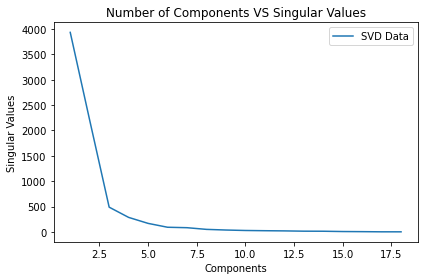

In [117]:
plt.plot(np.arange(1, X5.singular_values_.size + 1), X5.singular_values_, label='SVD Data')
plt.title("Number of Components VS Singular Values")
plt.xlabel('Components')
plt.ylabel('Singular Values')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### 8.2 SVD K-Mean Clustering

In [129]:
svd = SVD(n_components=7, random_state=1)
X5 = svd.fit_transform(X)
X5

array([[ 7.15743787e+01,  5.76405905e+00, -7.02289196e-01, ...,
        -1.73403110e+00,  6.12716393e-01,  3.31290115e-01],
       [ 7.81168518e+01,  1.19280183e+01,  9.61566878e-01, ...,
        -6.22399044e+00,  2.12204455e+00,  1.94138816e+00],
       [ 1.38799900e+02, -4.36530931e+01,  6.58876894e+00, ...,
         1.96194910e+00,  4.90085781e-01, -2.56106533e+00],
       ...,
       [ 1.02398475e+02, -5.06374546e+01, -1.25777999e+00, ...,
        -1.62257173e+00,  1.03583509e+00, -1.00103132e-01],
       [ 7.59904820e+01, -1.18598049e+01, -2.82191421e+00, ...,
        -3.37803686e+00, -6.71600006e-01,  6.42311665e-01],
       [ 5.79272081e+01,  3.87651712e+01, -1.64865604e+01, ...,
        -1.18271492e-01,  1.03149674e+00, -3.83759334e-01]])

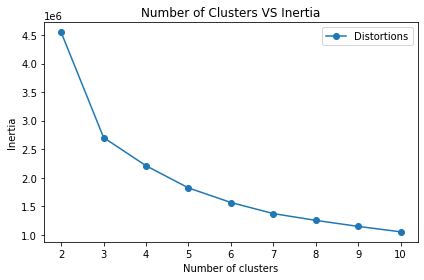

In [130]:
inertias = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(X5,y)
    inertias.append(km.inertia_)
    
plt.plot(range(2,11), inertias, marker='o', label='Distortions')
plt.title("Number of Clusters VS Inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

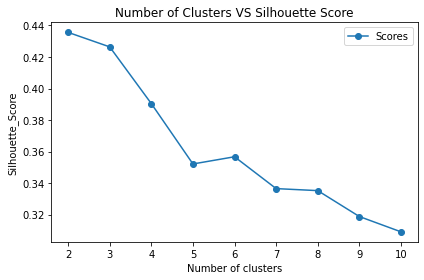

[0.4356195656102062, 0.42640329666995264, 0.3904236030011816, 0.35213879365421186, 0.35670738983196265, 0.3365049406150972, 0.3352249636751201, 0.31879228328701736, 0.3090863714482302]
0.36232235642144217


In [131]:
silhouette_scores = []
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    labels = km.fit_predict(X5)

    silhouette_avg = silhouette_score(X5, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2,11), silhouette_scores, marker='o', label='Scores')
plt.title("Number of Clusters VS Silhouette Score")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print (silhouette_scores)
print (sum(silhouette_scores)/len(silhouette_scores))

### 8.3 SVD Expectation Maximization Clustering

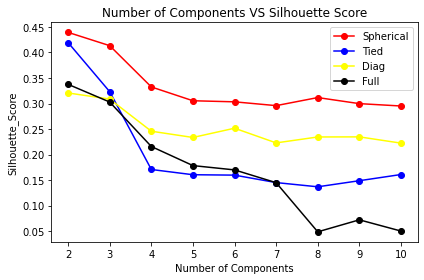

[0.4394016450134796, 0.4133333708719815, 0.33246555366421415, 0.305411251369663, 0.30330374187701536, 0.29584605454724555, 0.31165091493808567, 0.299765119293044, 0.2951219888045601]
0.33292218226436543


In [124]:
silhouette_scores_one = []
silhouette_scores_two = []
silhouette_scores_three = []
silhouette_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    silhouette_scores_one.append(silhouette_score(X5, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    silhouette_scores_two.append(silhouette_score(X5, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    silhouette_scores_three.append(silhouette_score(X5, labels))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    silhouette_scores_four.append(silhouette_score(X5, labels))


plt.plot(range(2,11), silhouette_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), silhouette_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), silhouette_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), silhouette_scores_four, marker='o', color='black', label='Full')
plt.title("Number of Components VS Silhouette Score")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette_Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
print (silhouette_scores_one)
print (sum(silhouette_scores_one)/len(silhouette_scores_one))

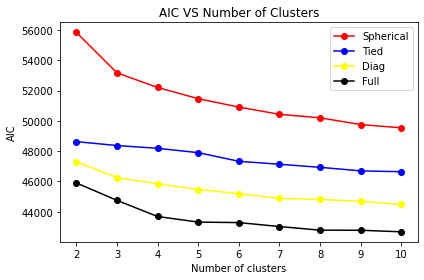

In [125]:
aic_scores_one = []
aic_scores_two = []
aic_scores_three = []
aic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    aic_scores_one.append(em.aic(X5))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X5)
    aic_scores_two.append(ems.aic(X5))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X5)
    aic_scores_three.append(emss.aic(X5))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X5)
    aic_scores_four.append(emsss.aic(X5))

plt.plot(range(2,11), aic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), aic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), aic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), aic_scores_four, marker='o', color='black', label='Full')
plt.title('AIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

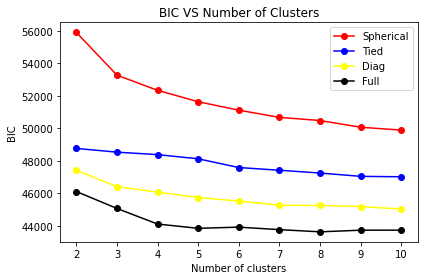

In [126]:
bic_scores_one = []
bic_scores_two = []
bic_scores_three = []
bic_scores_four = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    bic_scores_one.append(em.bic(X5))
    
for i in range(2,11):    
    ems = GaussianMixture(n_components=i,covariance_type='tied',n_init=1,warm_start=True,random_state=1)
    labelss = ems.fit_predict(X5)
    bic_scores_two.append(ems.bic(X5))
    
for i in range(2,11):
    emss = GaussianMixture(n_components=i,covariance_type='diag',n_init=1,warm_start=True,random_state=1)
    labelsss = emss.fit_predict(X5)
    bic_scores_three.append(emss.bic(X5))
    
for i in range(2,11):
    emsss = GaussianMixture(n_components=i,covariance_type='full',n_init=1,warm_start=True,random_state=1)
    labelssss = emsss.fit_predict(X5)
    bic_scores_four.append(emsss.bic(X5))

plt.plot(range(2,11), bic_scores_one, marker='o', color='red', label='Spherical')
plt.plot(range(2,11), bic_scores_two, marker='o', color='blue', label='Tied')
plt.plot(range(2,11), bic_scores_three, marker='o', color='yellow', label='Diag')
plt.plot(range(2,11), bic_scores_four, marker='o', color='black', label='Full')
plt.title('BIC VS Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

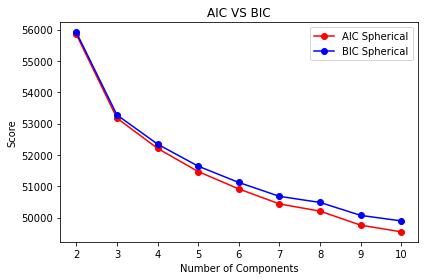

In [128]:
aic_s = []
bic_s = []

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    aic_s.append(em.aic(X5))

for i in range(2,11):
    em = GaussianMixture(n_components=i,covariance_type='spherical',n_init=1,warm_start=True,random_state=1)
    labels = em.fit_predict(X5)
    bic_s.append(em.bic(X5))
    
plt.plot(range(2,11), aic_s, marker='o', color='red', label='AIC Spherical')
plt.plot(range(2,11), bic_s, marker='o', color='blue', label='BIC Spherical')
plt.title('AIC VS BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
